In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import ranksums
from scipy.stats import f_oneway

In [159]:
perf_auto = pd.read_csv("performance_autoencoding.csv", index_col = 0)
perf_btw = pd.read_csv("performance_between_omics.csv", index_col = 0)

In [160]:
perf_auto['method'] = ['raw'] * 5 + ['autoencode'] * 5
perf_btw['method'] = ['raw'] * 5 + ['pred_MBX'] * 5
perf_auto['omic'] = ['16s', 'MTG', 'MTT', 'MBX', 'ALL'] * 2
perf_btw['omic'] = ['16s', 'MTG', 'MTT', 'MBX', 'ALL'] * 2

In [161]:
perf = pd.concat([perf_auto, perf_btw])
melted = perf.melt(['method', 'omic'])
fig= plt.figure(figsize = (14,6))
labels = ["raw_16S", "autoencode_16S", "16S_MBX", 
"raw_MTG", "autoencode_MTG", "MTG_MBX",
"raw_MTT", "autoencode_MTT", "MTT_MBX",
"raw_MBX", "autoencode_MBX", "MBX_filt",
"raw_ALL", "autoencode_ALL", "ALL_MBX"]



<Figure size 1008x432 with 0 Axes>

In [162]:
melted

,method,omic,variable,value
0,raw,16s,fruit,-0.392685
1,raw,MTG,fruit,0.257351
2,raw,MTT,fruit,0.257351
3,raw,MBX,fruit,0.276176
4,raw,ALL,fruit,0.390866
...,...,...,...,...
295,pred_MBX,16s,fat_oil_freq,-0.216239
296,pred_MBX,MTG,fat_oil_freq,0.232386
297,pred_MBX,MTT,fat_oil_freq,-0.251062
298,pred_MBX,MBX,fat_oil_freq,-0.065562


In [163]:
melted['freq'] = ['long-term' if ('freq' in i) else 'short-term' for i in melted.variable]
melted['freq'][melted.variable == 'multivitamin'] = 'long-term'
melted['freq'][melted.variable == 'probiotic'] = 'long-term'
melted['freq'][melted.variable == 'phenotype'] = 'long-term'

c:\users\ctata\miniconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\ctata\miniconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\ctata\miniconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

c:\users\ctata\miniconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


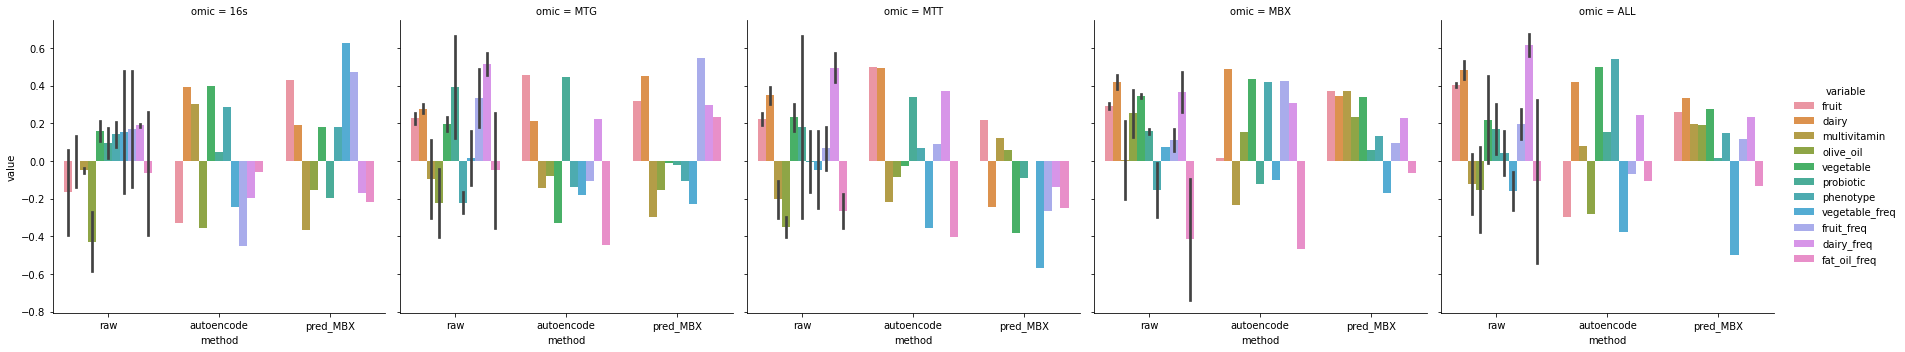

In [84]:
#facet wrap by omic, group by frequency, add stats between 
sns.factorplot(x = 'method', y = 'value', hue = 'variable', col = 'omic', data = melted,
              kind = 'bar')
#g = sns.FacetGrid(data = melted, col = 'omic', hue = 'variable')
#g.map(sns.boxplot,  'method', 'value')
#g.map(sns.barplot, 'method', 'value')
#s.set_xticklabels(s.get_xticklabels(), rotation = 90)
#s.tick_params(labelsize = 16)
#sns.barplot(x = 'method', y = 'value', hue = 'variable', data = melted)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = '16')

0.006482657537974189

In [177]:

#16s is almost significantly better at predicting long term phenomenon
short_term = melted.loc[[i == '16s' and j == 'raw' and k == 'short-term' for i, j, k in zip(melted.omic, melted.method, melted.freq)],:]
long_term = melted.loc[[i == '16s' and j == 'raw' and k == 'long-term' for i, j, k in zip(melted.omic, melted.method, melted.freq)],:]
short_long_16s_raw = ttest_ind(short_term.value.values, long_term.value.values, nan_policy='omit')[1]

#Adding in MBX info to 16s does not significantly improve prediction
short_term = melted.loc[[i == '16s' and j == 'raw' and k == 'short-term' for i, j, k in zip(melted.omic, melted.method, melted.freq)],:]
long_term = melted.loc[[i == '16s' and j == 'pred_MBX' and k == 'short-term' for i, j, k in zip(melted.omic, melted.method, melted.freq)],:]
short_shot_pred_mbx = ttest_ind(short_term.value.values, long_term.value.values, nan_policy='omit')[1]

#MBX is significantly better at short term, both before and after filtering
short_term = melted.loc[[i == 'MBX' and j == 'raw' and k == 'short-term' for i, j, k in zip(melted.omic, melted.method, melted.freq)],:]
long_term = melted.loc[[i == 'MBX' and j == 'raw' and k == 'long-term' for i, j, k in zip(melted.omic, melted.method, melted.freq)],:]
short_long_mbx_raw = ttest_ind(short_term.value.values, long_term.value.values, nan_policy='omit')[1]

short_term = melted.loc[[i == 'MBX' and j == 'autoencode' and k == 'short-term' for i, j, k in zip(melted.omic, melted.method, melted.freq)],:]
long_term = melted.loc[[i == 'MBX' and j == 'autoencode' and k == 'long-term' for i, j, k in zip(melted.omic, melted.method, melted.freq)],:]
short_long_mbx_auto = ttest_ind(short_term.value.values, long_term.value.values, nan_policy='omit')[1]

short_term = melted.loc[[i == 'MBX' and j == 'pred_MBX' and k == 'short-term' for i, j, k in zip(melted.omic, melted.method, melted.freq)],:]
long_term = melted.loc[[i == 'MBX' and j == 'pred_MBX' and k == 'long-term' for i, j, k in zip(melted.omic, melted.method, melted.freq)],:]
short_long_mbx_mbx = ttest_ind(short_term.value.values, long_term.value.values, nan_policy='omit')[1]

#
short_term = melted.loc[[i == 'ALL' and j == 'raw' and k == 'short-term' for i, j, k in zip(melted.omic, melted.method, melted.freq)],:]
long_term = melted.loc[[i == 'ALL' and j == 'pred_MBX' and k == 'short-term' for i, j, k in zip(melted.omic, melted.method, melted.freq)],:]
f_oneway(short_term.value.values, long_term.value.values)

F_onewayResult(statistic=nan, pvalue=nan)

Text(-0.2, 1.5, 'p=0.079')

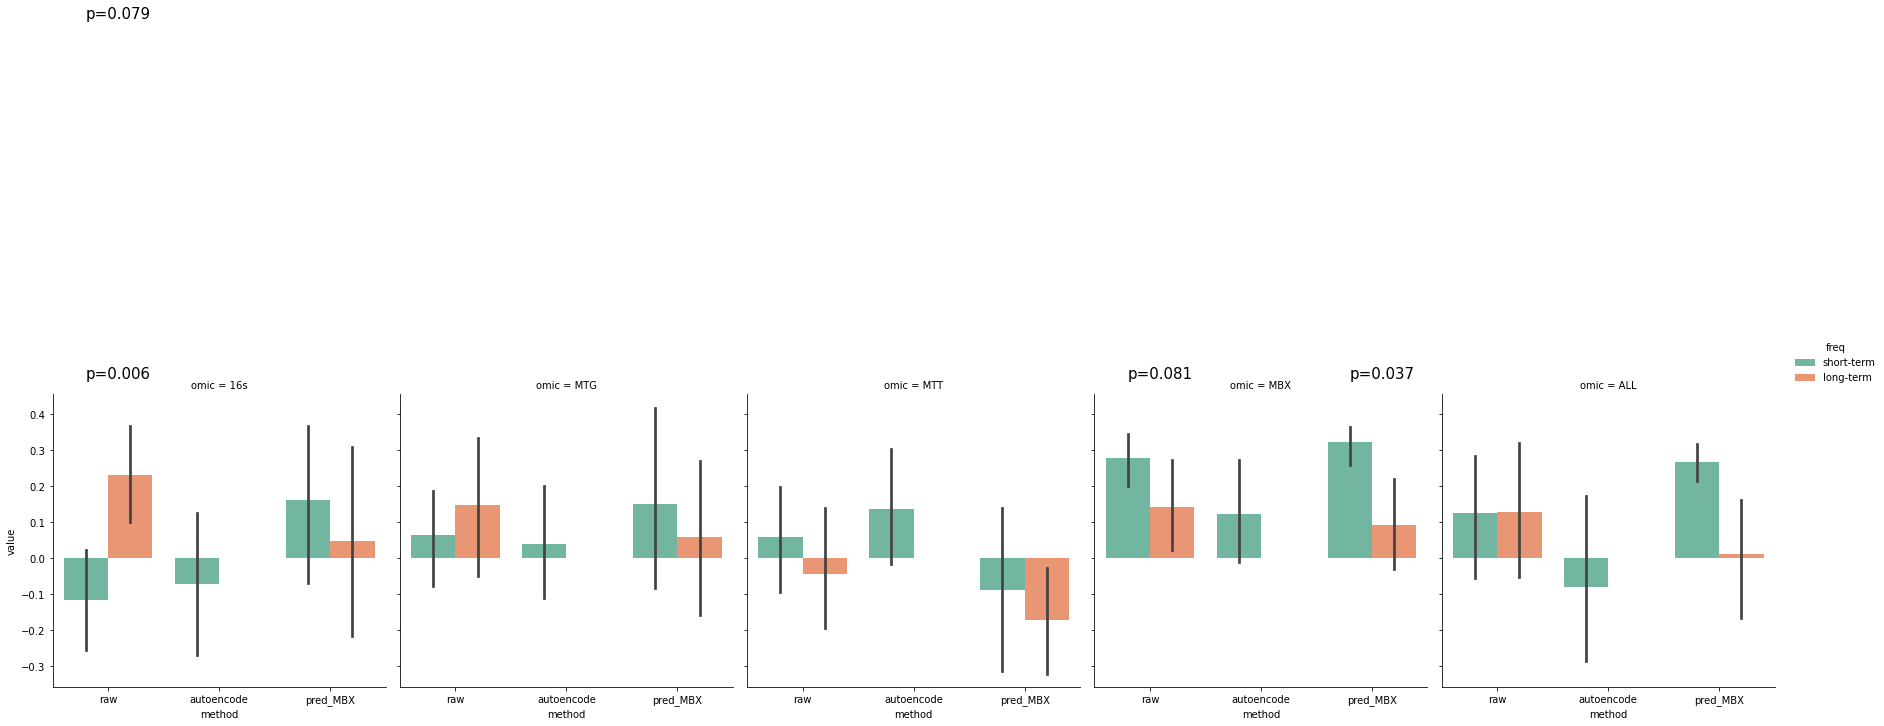

In [179]:
sns.set_palette("Set2")
s = sns.factorplot(x = 'method', y = 'value', hue = 'freq', col = 'omic', data = melted,
              kind = 'bar')
s.axes.flat[0].text(-0.2,0.5, 'p='+ str(round(short_long_16s_raw, 3)), fontsize = 15)
s.axes.flat[3].text(-0.2,0.5, 'p='+ str(round(short_long_mbx_raw, 3)), fontsize = 15)
s.axes.flat[3].text(1.8,0.5, 'p='+ str(round(short_long_mbx_mbx, 3)), fontsize = 15)
s.axes.flat[0].text(-0.2,1.5, 'p='+ str(round(short_shot_pred_mbx, 3)), fontsize = 15)


In [106]:
raw = ["raw" in i for i in perf_auto.index.values]
print(raw)
mbx = ['16S_MBX', "MTG_MBX", "MTT_MBX"]
print(ranksums(perf_auto.loc[raw, :].values.flatten(), perf_btw.loc[mbx, :].values.flatten()))

[True, True, True, True, True, False, False, False, False, False]
RanksumsResult(statistic=1.0916143604417559, pvalue=0.27500264142516173)


In [125]:
keep = ['fruit', 'fruit_freq', 'vegetable', 'vegetable_freq', 'olive_oil', 'fat_oil_freq', 'dairy', 'dairy_freq', 'method']
perf = perf.loc[: , keep]
melted = perf.melt('method')
melted['freq'] = ["long-term" if 'freq' in i else "short-term" for i in melted.variable ]

[Text(0, 0, 'raw_16S'),
 Text(0, 0, 'raw_MTG'),
 Text(0, 0, 'raw_MTT'),
 Text(0, 0, 'raw_MBX'),
 Text(0, 0, 'raw_ALL'),
 Text(0, 0, 'autoencode_16S'),
 Text(0, 0, 'autoencode_MTG'),
 Text(0, 0, 'autoencode_MTT'),
 Text(0, 0, 'autoencode_MBX'),
 Text(0, 0, 'autoencode_ALL'),
 Text(0, 0, '16S_MBX'),
 Text(0, 0, 'MTG_MBX'),
 Text(0, 0, 'MTT_MBX'),
 Text(0, 0, 'MBX_filt'),
 Text(0, 0, 'ALL_MBX')]

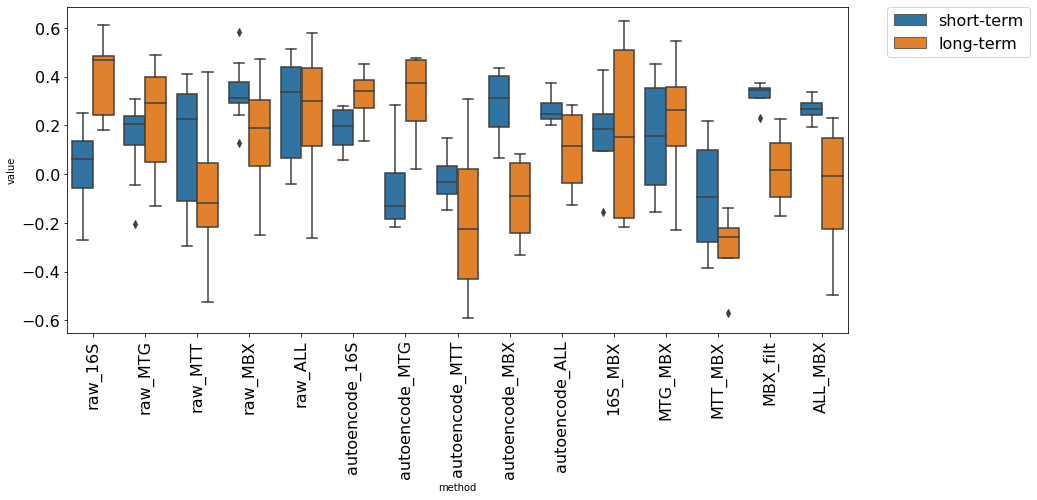

In [126]:
fig= plt.figure(figsize = (14,6))
s = sns.boxplot(x = 'method', y = 'value', hue = "freq", data = melted)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = '16')
s.tick_params(labelsize = 16)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
#sns.stripplot(x = 'method', y = 'value', hue = 'freq', data = melted, size = 5)